In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime 
import requests
from io import StringIO
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from lxml import html

In [96]:
df_mercado_libre_modelos = pd.read_csv('./CSV/df_mercado_libre_modelos.csv')
df_mercado_libre_modelos

,type,link_web,modelo,marca,anio,precio,version,color,combustible,puertas,transmision,motor,vehiculo
0,0km,https://auto.mercadolibre.com.ar/MLA-145029973...,Chevrolet Tracker 1.2 Turbo At,Chevrolet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0km,https://auto.mercadolibre.com.ar/MLA-148581689...,Peugeot 208 1.2 New Like,Peugeot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0km,https://auto.mercadolibre.com.ar/MLA-148582147...,Volkswagen Amarok 3.0 V6 Extreme,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0km,https://auto.mercadolibre.com.ar/MLA-148579483...,Volkswagen Amarok 3.0 V6 Cd Highline,Volkswagen,2023.0,26.850.003,3.0 V6 Cd Highline,Blanco,Diésel,4,Automática,3.0,Pick-Up
4,0km,https://auto.mercadolibre.com.ar/MLA-148584696...,Volkswagen Amarok 3.0 V6 Cd Comfortline,Volkswagen,2023.0,21.550.003,3.0 V6 Cd Comfortline,Blanco,Diésel,4,Automática,3.0,Pick-Up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,usado,https://auto.mercadolibre.com.ar/MLA-138129962...,Peugeot 2008 1.6 Allure Tip,Peugeot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1062,usado,https://auto.mercadolibre.com.ar/MLA-144740810...,Jeep Renegade 1.8 Sport,Jeep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1063,usado,https://auto.mercadolibre.com.ar/MLA-137762034...,Volkswagen Amarok 3.0 V6 Extreme,Volkswagen,2021.0,14.500.000,3.0 V6 Extreme,Blanco,Eléctrico,4,Automática,3.0,Pick-Up
1064,usado,https://auto.mercadolibre.com.ar/MLA-146356845...,Kia Sportage 2.0 Ex 2wd 163cv At,Kia,2013.0,7.655.000,2.0 Ex 2wd 163cv At,Negro,Nafta,5,Automática,2.0,92000 km


In [97]:
df_mercado_libre_modelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   type         1066 non-null   object 
 1   link_web     1066 non-null   object 
 2   modelo       1066 non-null   object 
 3   marca        1066 non-null   object 
 4   anio         303 non-null    float64
 5   precio       303 non-null    object 
 6   version      303 non-null    object 
 7   color        303 non-null    object 
 8   combustible  303 non-null    object 
 9   puertas      303 non-null    object 
 10  transmision  302 non-null    object 
 11  motor        300 non-null    object 
 12  vehiculo     294 non-null    object 
dtypes: float64(1), object(12)
memory usage: 108.4+ KB


In [98]:
df_mercado_libre_modelos.isnull().sum()

type             0
link_web         0
modelo           0
marca            0
anio           763
precio         763
version        763
color          763
combustible    763
puertas        763
transmision    764
motor          766
vehiculo       772
dtype: int64

In [99]:
# columns_to_check = ['combustible', 'transmision', 'motor', 'vehiculo', 'puertas', 'color', 'version']

# # Verificar si todos los valores en las columnas seleccionadas no son NaN
# not_nan_mask = df_mercado_libre_modelos[columns_to_check].notna().all(axis=1)

# # Filtrar filas donde todos los valores en las columnas seleccionadas no son NaN
# filtered_df = df_mercado_libre_modelos[not_nan_mask]

# filtered_df.reset_index(drop=True)

filtered_NA = df_mercado_libre_modelos.notna().all(axis=1)
filtered_df = df_mercado_libre_modelos[filtered_NA]
filtered_df

,type,link_web,modelo,marca,anio,precio,version,color,combustible,puertas,transmision,motor,vehiculo
3,0km,https://auto.mercadolibre.com.ar/MLA-148579483...,Volkswagen Amarok 3.0 V6 Cd Highline,Volkswagen,2023.0,26.850.003,3.0 V6 Cd Highline,Blanco,Diésel,4,Automática,3.0,Pick-Up
4,0km,https://auto.mercadolibre.com.ar/MLA-148584696...,Volkswagen Amarok 3.0 V6 Cd Comfortline,Volkswagen,2023.0,21.550.003,3.0 V6 Cd Comfortline,Blanco,Diésel,4,Automática,3.0,Pick-Up
6,0km,https://auto.mercadolibre.com.ar/MLA-148589864...,Volkswagen Amarok 2.0 Cd Tdi 180cv Comfortline,Volkswagen,2023.0,16.950.003,2.0 Cd Tdi 180cv Comfortline,Blanco,Eléctrico,4,Manual,2.0,Pick-Up
8,0km,https://auto.mercadolibre.com.ar/MLA-148042873...,Volkswagen Amarok 3.0 V6 Extreme,Volkswagen,2023.0,28.500.002,3.0 V6 Extreme,Blanco,Diésel,4,Automática,3.0,Pick-Up
9,0km,https://auto.mercadolibre.com.ar/MLA-148042856...,Volkswagen Amarok 3.0 V6 Cd Highline,Volkswagen,2023.0,26.850.002,3.0 V6 Cd Highline,Blanco,Diésel,4,Automática,3.0,Pick-Up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,usado,https://auto.mercadolibre.com.ar/MLA-147041700...,Volkswagen Fox 1.6 Trendline,Volkswagen,2013.0,6.900,1.6 Trendline,Blanco,Nafta,3,Manual,1.6,Hatchback
1055,usado,https://auto.mercadolibre.com.ar/MLA-138190025...,Peugeot 406 1.9 T,Peugeot,1998.0,1.800.000,1.9 T,Dorado,Diésel,4,Manual,1.9,Sedán
1063,usado,https://auto.mercadolibre.com.ar/MLA-137762034...,Volkswagen Amarok 3.0 V6 Extreme,Volkswagen,2021.0,14.500.000,3.0 V6 Extreme,Blanco,Eléctrico,4,Automática,3.0,Pick-Up
1064,usado,https://auto.mercadolibre.com.ar/MLA-146356845...,Kia Sportage 2.0 Ex 2wd 163cv At,Kia,2013.0,7.655.000,2.0 Ex 2wd 163cv At,Negro,Nafta,5,Automática,2.0,92000 km


In [100]:
filtered_df.isnull().sum()

type           0
link_web       0
modelo         0
marca          0
anio           0
precio         0
version        0
color          0
combustible    0
puertas        0
transmision    0
motor          0
vehiculo       0
dtype: int64

### Cuantos modelos tiene que cada marca

In [106]:
used_cars_filtered_df = filtered_df[filtered_df['type'] == 'usado'].groupby('marca').count().reset_index().sort_values('modelo', ascending=False)[['marca', 'modelo']]
used_cars_filtered_df

,marca,modelo
2,Chevrolet,26
5,Fiat,14
6,Ford,14
18,Volkswagen,13
1,Audi,10
17,Toyota,9
13,Peugeot,9
9,Jeep,9
3,Citroën,9
15,Renault,7


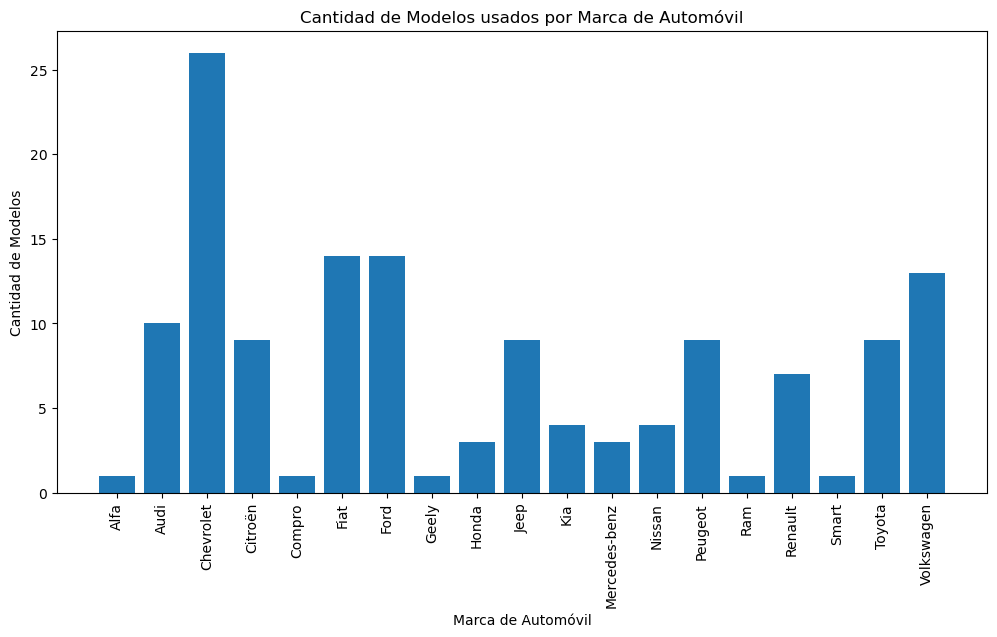

In [102]:
plt.figure(figsize=(12, 6))
plt.bar(used_cars_filtered_df['marca'], used_cars_filtered_df['modelo'])
plt.xlabel('Marca de Automóvil')
plt.ylabel('Cantidad de Modelos')
plt.title('Cantidad de Modelos usados por Marca de Automóvil')
plt.xticks(rotation=90)  # Para rotar las etiquetas del eje x si es necesario
plt.show()

In [107]:
okm_cars_filtered_df = filtered_df[filtered_df['type'] == '0km'].groupby('marca').count().reset_index().sort_values('modelo', ascending=False)[['marca', 'modelo']]
okm_cars_filtered_df 

,marca,modelo
16,Volkswagen,38
7,Fiat,32
14,Renault,16
3,Chevrolet,12
13,Peugeot,12
1,Bmw,10
10,Jeep,9
15,Toyota,8
6,Ds,5
11,Kia,3


In [104]:
# print(okm_cars_filtered_df.columns)
# okm_cars_filtered_df['marca']

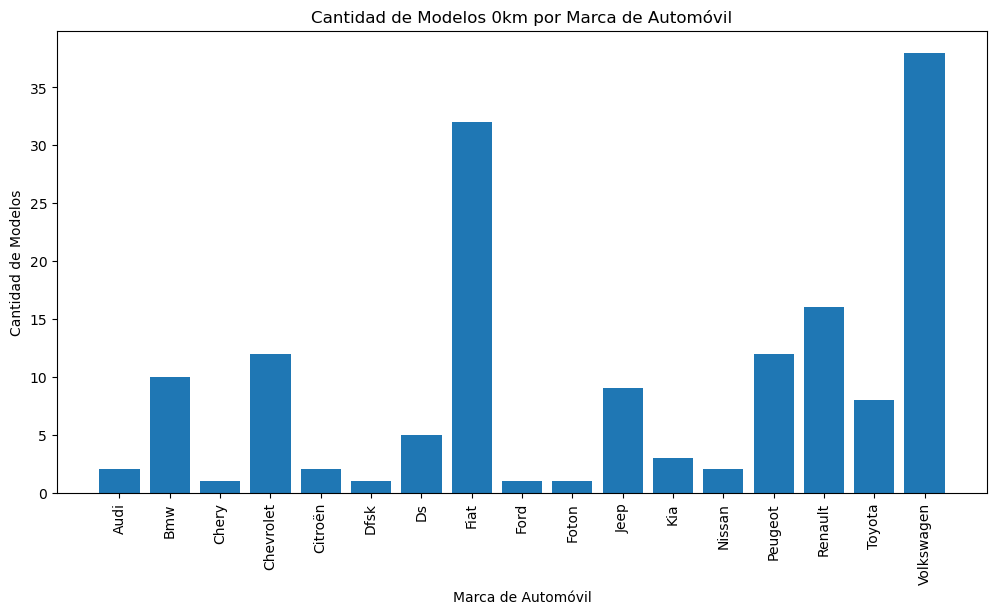

In [105]:
plt.figure(figsize=(12, 6))
plt.bar(okm_cars_filtered_df['marca'], okm_cars_filtered_df['modelo'])
plt.xlabel('Marca de Automóvil')
plt.ylabel('Cantidad de Modelos')
plt.title('Cantidad de Modelos 0km por Marca de Automóvil')
plt.xticks(rotation=90)  # Para rotar las etiquetas del eje x si es necesario
plt.show()